In [14]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization (optional but good)
import matplotlib.pyplot as plt
import seaborn as sns

# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [15]:
df = pd.read_csv("/kaggle/input/carbon-footprint-regression/Carbon FootPrint - Regression .csv")

df.head()


,Personal_Vehicle_Km,Public_Vehicle_Km,Plane_Journey_Count,Train_Journey_Count,Electricity_Kwh,Water_Usage_Liters,Diet_Type,Waste_Kg,Carbon_Footprint_Kg
0,49.771537,67.597204,4,9,299.578448,51.799940,Veg,0.433914,52.475928
1,64.476199,-49.000833,1,0,16.145718,-170.486021,MostlyVeg,0.447913,12.503403
2,-47.753889,2.133305,9,1,187.377441,-159.132762,NonVeg,0.397881,33.154768
3,1.572282,-47.871388,1,2,366.394573,-141.009555,Veg,0.451903,7.213233
4,28.137154,2.442315,1,10,455.301692,-129.647609,Both,0.357465,28.894928


In [16]:
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Personal_Vehicle_Km  1000 non-null   float64
 1   Public_Vehicle_Km    1000 non-null   float64
 2   Plane_Journey_Count  1000 non-null   int64  
 3   Train_Journey_Count  1000 non-null   int64  
 4   Electricity_Kwh      1000 non-null   float64
 5   Water_Usage_Liters   1000 non-null   float64
 6   Diet_Type            1000 non-null   object 
 7   Waste_Kg             1000 non-null   float64
 8   Carbon_Footprint_Kg  1000 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 70.4+ KB


In [17]:
df.isnull().sum()


Personal_Vehicle_Km    0
Public_Vehicle_Km      0
Plane_Journey_Count    0
Train_Journey_Count    0
Electricity_Kwh        0
Water_Usage_Liters     0
Diet_Type              0
Waste_Kg               0
Carbon_Footprint_Kg    0
dtype: int64

In [18]:
le = LabelEncoder()
df['Diet_Type'] = le.fit_transform(df['Diet_Type'])


In [19]:
X = df.drop("Carbon_Footprint_Kg", axis=1)
y = df["Carbon_Footprint_Kg"]


In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


In [23]:
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance
MAE: 1.4965296514534463
RMSE: 1.9696204500881895
R2 Score: 0.9875297692429263


In [24]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
    

In [25]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance
MAE: 3.599897640629403
RMSE: 4.575832716624717
R2 Score: 0.9326946357886271


In [26]:
importances = rf.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feature_importance_df


,Feature,Importance
2,Plane_Journey_Count,0.616029
0,Personal_Vehicle_Km,0.243270
1,Public_Vehicle_Km,0.068412
4,Electricity_Kwh,0.025950
3,Train_Journey_Count,0.022208
5,Water_Usage_Liters,0.010304
7,Waste_Kg,0.009596
6,Diet_Type,0.004231


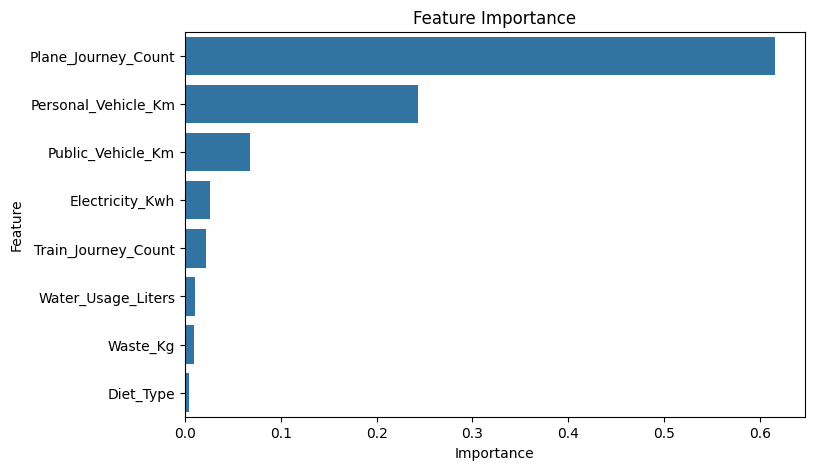

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance")
plt.show()


In [28]:
import pickle

with open("eco_model.pkl", "wb") as f:
    pickle.dump(rf, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


'Personal_Vehicle_Km'
'Public_Vehicle_Km'
'Plane_Journey_Count'
'Train_Journey_Count'
'Electricity_Kwh'
'Water_Usage_Liters'
'Diet_Type'
'Waste_Kg'
'Carbon_Footprint_Kg'
